In [38]:
import keras
from keras.applications import VGG19, InceptionV3
from keras.datasets import mnist

from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np

from keras.layers.convolutional import Conv2D
from keras.engine.topology import InputLayer
from keras.layers.pooling import MaxPooling2D

from keras import backend as K
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from copy import deepcopy

from attr import attrs, attrib

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
@attrs
class GraphableNeruon(object):
    weights = attrib()
    bias = attrib()
    layer = attrib()
    neuron_number = attrib()
    layer_type = attrib()




In [4]:
def get_neurons(net):
    neurons = []
    for i, layer in enumerate(net.layers):
        if type(layer) is Conv2D:
            wts, bias = layer.get_weights()
            for nn, (w, b) in enumerate(zip(wts.T, bias)):
                neurons.append(GraphableNeruon(w, b, i, nn, layer.get_config()))
    return neurons

In [5]:
def set_neurons(neurons, net):
    last_neuron = neurons[0]
    layer = net.layers[last_neuron.layer]
    layer_weights, layer_bias = layer.get_weights()
    layer_weights = layer_weights.T
    for n in neurons:
        if not last_neuron.layer == n.layer:
            layer.set_weights([layer_weights.T, layer_bias])
            layer = net.layers[n.layer]
            layer_weights, layer_bias = layer.get_weights()
            layer_weights = layer_weights.T
            last_neuron = n
        
        layer_weights[n.neuron_number] = n.weights
        layer_bias[n.neuron_number] = n.bias
        
    
        

untrained_vgg = VGG19(weights=None)
untrained_vgg.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

untrained_vgg.fit(x_train, y_train, epochs=1, verbose=1, batch_size=32, validation_data=(x_test, y_test))

In [109]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(list(x_train.shape) + [1])
x_test = x_test.reshape(list(x_test.shape) + [1])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, len(set(y_train)))
y_test = keras.utils.to_categorical(y_test, len(set(y_test)))

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

chunk_size = 100
x_chunks = np.split(x_train, len(x_train) // chunk_size)
y_chunks = np.split(y_train, len(y_train) // chunk_size)

neuron_list = [get_neurons(model)]
acc_list = []
for img, cls in zip(x_chunks, y_chunks):
    neurons = sleep(neuron_list, 0, get_neurons(model))
    set_neurons(neurons, model)
    model.fit(img, cls,
              batch_size=25,
              epochs=1,
              verbose=1,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=1)
    neuron_list.append(get_neurons(model))
    acc_list.append(score[1])
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])



Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 2.17959603462
Test accuracy: 0.1969
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 2.01363185844
Test accuracy: 0.5892
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 1.76268197784
Test accuracy: 0.563
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 1.63124401207
Test accuracy: 0.4201
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 1.1830875844
Test accuracy: 0.6868
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 1.01090613642
Test accuracy: 0.7291
Train on 100 samples, validate on 10000 samples


 9888/10000 [============================>.] - ETA: 0sTest loss: 0.375769085085
Test accuracy: 0.8867
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.346899972725
Test accuracy: 0.9018
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.398194041383
Test accuracy: 0.8851
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.373248327923
Test accuracy: 0.8905
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.336085852218
Test accuracy: 0.9041
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.340148720235
Test accuracy: 0.8974
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [===========================

10000/10000 [==============================] - 2s     
Test loss: 0.243611643445
Test accuracy: 0.9292
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.25282781927
Test accuracy: 0.9238
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.272718310112
Test accuracy: 0.9173
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.255272938925
Test accuracy: 0.9221
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.242577048326
Test accuracy: 0.9277
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.228373844525
Test accuracy: 0.9331
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [==========================

 9920/10000 [============================>.] - ETA: 0sTest loss: 0.203044361328
Test accuracy: 0.9424
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.199070828319
Test accuracy: 0.943
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.205541429807
Test accuracy: 0.9433
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.215673637298
Test accuracy: 0.9393
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.201097157019
Test accuracy: 0.9432
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.18998068499
Test accuracy: 0.9452
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>

 9952/10000 [============================>.] - ETA: 0sTest loss: 0.166083929027
Test accuracy: 0.9517
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.179320234831
Test accuracy: 0.9453
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.176071233524
Test accuracy: 0.9458
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.172104906569
Test accuracy: 0.949
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.170477251261
Test accuracy: 0.9503
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.1713985021
Test accuracy: 0.951
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.

 9952/10000 [============================>.] - ETA: 0sTest loss: 0.137895255173
Test accuracy: 0.9592
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.142788262265
Test accuracy: 0.9567
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.135682595461
Test accuracy: 0.9588
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.141338185483
Test accuracy: 0.9571
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.13760804768
Test accuracy: 0.9582
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.132243843018
Test accuracy: 0.9588
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================

 9984/10000 [============================>.] - ETA: 0sTest loss: 0.126153701429
Test accuracy: 0.9601
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.123639661347
Test accuracy: 0.9597
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.123738884389
Test accuracy: 0.9603
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.126317845063
Test accuracy: 0.9605
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.128303207855
Test accuracy: 0.9584
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.126866029701
Test accuracy: 0.959
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================

 9920/10000 [============================>.] - ETA: 0sTest loss: 0.116152722713
Test accuracy: 0.9631
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.115050400923
Test accuracy: 0.9633
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.112926883158
Test accuracy: 0.963
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.115507280414
Test accuracy: 0.9625
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.116089144556
Test accuracy: 0.9621
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.112178783067
Test accuracy: 0.9631
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [===========================

 9984/10000 [============================>.] - ETA: 0sTest loss: 0.104981268299
Test accuracy: 0.9669
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.105547036161
Test accuracy: 0.9664
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.10910139474
Test accuracy: 0.9655
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.110375219206
Test accuracy: 0.9657
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.104943294503
Test accuracy: 0.9659
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.114581606983
Test accuracy: 0.9642
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [==========================

 9920/10000 [============================>.] - ETA: 0sTest loss: 0.108252657629
Test accuracy: 0.9663
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.101558258407
Test accuracy: 0.969
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.100634572289
Test accuracy: 0.9689
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.103781196596
Test accuracy: 0.9677
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.102607682753
Test accuracy: 0.9682
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.102406980603
Test accuracy: 0.9676
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================

 9888/10000 [============================>.] - ETA: 0sTest loss: 0.102308794531
Test accuracy: 0.968
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.100638713728
Test accuracy: 0.9677
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.0984072377296
Test accuracy: 0.9684
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.0965993017873
Test accuracy: 0.9693
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.0940457577934
Test accuracy: 0.9696
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.0947287485094
Test accuracy: 0.9684
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [========================

 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0899570611821
Test accuracy: 0.971
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.0899809203614
Test accuracy: 0.9697
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0885574924393
Test accuracy: 0.9714
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.0897703966536
Test accuracy: 0.9712
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0900510918034
Test accuracy: 0.971
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.0924879429329
Test accuracy: 0.9698
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [=======================

 9920/10000 [============================>.] - ETA: 0sTest loss: 0.0957063628456
Test accuracy: 0.9693
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.091359605778
Test accuracy: 0.97
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.0876779191848
Test accuracy: 0.9714
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0887186446935
Test accuracy: 0.971
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.100056846256
Test accuracy: 0.9663
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0974473100081
Test accuracy: 0.9693
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [=========================

 9920/10000 [============================>.] - ETA: 0sTest loss: 0.0832105002226
Test accuracy: 0.9732
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.0823644051292
Test accuracy: 0.9745
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0823200855048
Test accuracy: 0.9747
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0836578145668
Test accuracy: 0.9731
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.0866318042528
Test accuracy: 0.973
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0843518187243
Test accuracy: 0.974
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [=======================

 9888/10000 [============================>.] - ETA: 0sTest loss: 0.0810926269839
Test accuracy: 0.9741
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.084824951913
Test accuracy: 0.9734
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.0841340584073
Test accuracy: 0.9727
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.0822151199426
Test accuracy: 0.973
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.0796863933563
Test accuracy: 0.9748
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.0819807965521
Test accuracy: 0.9738
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [=======================

 9856/10000 [============================>.] - ETA: 0sTest loss: 0.0821241887981
Test accuracy: 0.974
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.080855698649
Test accuracy: 0.9745
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.0787182291406
Test accuracy: 0.9746
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.0764835107551
Test accuracy: 0.9756
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.0824975177215
Test accuracy: 0.974
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0815741540268
Test accuracy: 0.9743
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [=====================

 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0758476220427
Test accuracy: 0.9771
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.0740549545662
Test accuracy: 0.9769
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0752219677156
Test accuracy: 0.9765
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0717250180651
Test accuracy: 0.9777
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.0705868850775
Test accuracy: 0.9778
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTest loss: 0.0710067984745
Test accuracy: 0.9773
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [====================

 9920/10000 [============================>.] - ETA: 0sTest loss: 0.0674447286665
Test accuracy: 0.9792
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0666232985873
Test accuracy: 0.9793
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.0719305930047
Test accuracy: 0.9762
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.0715046306396
Test accuracy: 0.977
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0680511149128
Test accuracy: 0.9778
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0673358851121
Test accuracy: 0.9784
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [======================

 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0676320462861
Test accuracy: 0.9789
Train on 100 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s     
Test loss: 0.0676900475437
Test accuracy: 0.979
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0679585968415
Test accuracy: 0.9783
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTest loss: 0.067177097959
Test accuracy: 0.9787
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0666570314115
Test accuracy: 0.9784
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.0672258177275
Test accuracy: 0.9775
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [======================

 9952/10000 [============================>.] - ETA: 0sTest loss: 0.0707750268954
Test accuracy: 0.9766
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0698887645542
Test accuracy: 0.9772
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [============================>.] - ETA: 0sTest loss: 0.0712341122641
Test accuracy: 0.9771
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTest loss: 0.0736198158436
Test accuracy: 0.9766
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTest loss: 0.0693256760779
Test accuracy: 0.9779
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0705174069392
Test accuracy: 0.978
Train on 100 samples, validate on 10000 samples
Epoch 1/1
 9888/10000 [======================

In [ ]:
def sleep(H, state, current):
    last_wts = np.array([n.weights for n in H[-1]])
    current_wts = np.array([n.weights for n in current])
    delta = last_wts - current_wts
    new_wts = current_wts + sigmoid(delta)
    new_neurons = []
    for wt, curr_neuron in zip(new_wts, current):
        new_neur = deepcopy(curr_neuron)
        new_neur.weights=wt
        new_neurons.append(new_neur)
    return new_neurons

In [84]:
def sleep(H, state, current):
    last_wts = np.array([n.weights for n in H[-1]])
    current_wts = np.array([n.weights for n in current])
    delta = last_wts - current_wts
    new_wts = current_wts + delta*2
    new_neurons = []
    for wt, curr_neuron in zip(new_wts, current):
        new_neur = deepcopy(curr_neuron)
        new_neur.weights=wt
        new_neurons.append(new_neur)
    return new_neurons

In [104]:
def sleep(H, state, current):
    last_wts = np.array([n.weights for n in H[-1]])
    current_wts = np.array([n.weights for n in current])
    delta = last_wts - current_wts
    new_wts = current_wts + delta**2
    new_neurons = []
    for wt, curr_neuron in zip(new_wts, current):
        new_neur = deepcopy(curr_neuron)
        new_neur.weights=wt
        new_neurons.append(new_neur)
    return new_neurons

In [ ]:
plt.imshow(x_train[0], cmap="Greys")

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
y_train[0]

In [106]:
len(acc_list)

37

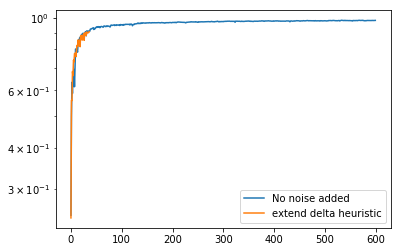

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
plt.plot(acc_no_noise)
plt.plot(acc_list[:600])
plt.legend(["No noise added", "extend delta heuristic"])
plt.show()

In [47]:
import pickle

In [65]:
with open('./accuracy.pickle', 'rb') as f:
    acc_no_noise = pickle.load(f)

In [45]:
!touch accuracy_random_sleep.pickle

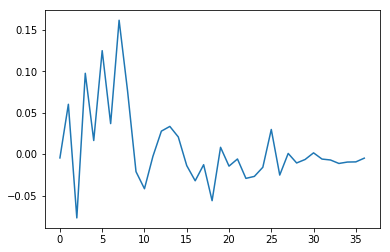

In [108]:
plt.plot([x-y for x, y in zip(acc_list, acc_no_noise)])